# Load data and preprocessing

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import geopandas as gpd
import plotly.graph_objs as graphObj
from plotly.offline import plot, iplot
import sys
import adjustText as aT
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [126]:
df = pd.read_csv('ECE 143.csv')
df.set_index(["State"], inplace=True)
# drop outlier
# df = df.drop("California") 
# df = df.drop("District of Columbia") # advanced degree outlier
df.head()

,Population,EV Sales\n2015,EV Sales\n2016,EV Sales\n2017,EV Sales\n2018,EV Sales\n2015 % of Total,EV Sales\n2016 % of Total,EV Sales\n2017 % of Total,EV Sales\n2018 % of Total,Avg % of Total Sales 2015-2018,...,Republican Representation,% Green Representation,% Libertarian/ Independent Representation,Median Household Income\t $,Electric Vehicle Tax Credit Program (1/0),Charging Locations,Charging Outlets,Outlets Per Location,EV Stock,EVs to Charging Outlets
State,,,,,,,,,,,,,,,,,,,,,
Alabama,4903185,197,330,381,866,0.0017,0.0023,0.0020,0.0026,0.0022,...,0.621,0.0044,0.021,56200,0,115,268,2.33,2487,9.28
Alaska,731545,61,94,85,155,0.0005,0.0006,0.0005,0.0005,0.0005,...,0.513,0.0180,0.059,78394,0,16,26,1.62,534,20.54
Arizona,7278717,1658,2265,2976,7086,0.0146,0.0156,0.0158,0.0216,0.0169,...,0.487,0.0133,0.041,70674,1,454,1223,2.69,18129,14.82
Arkansas,3017804,76,138,187,435,0.0007,0.0009,0.0010,0.0013,0.0010,...,0.606,0.0084,0.026,54539,0,72,196,2.72,1194,6.09
California,39512223,61590,73854,94873,153442,0.5438,0.5073,0.5047,0.4676,0.5059,...,0.316,0.0196,0.034,78105,1,5095,19687,3.86,506608,25.73


<AxesSubplot:xlabel='sale', ylabel='State'>

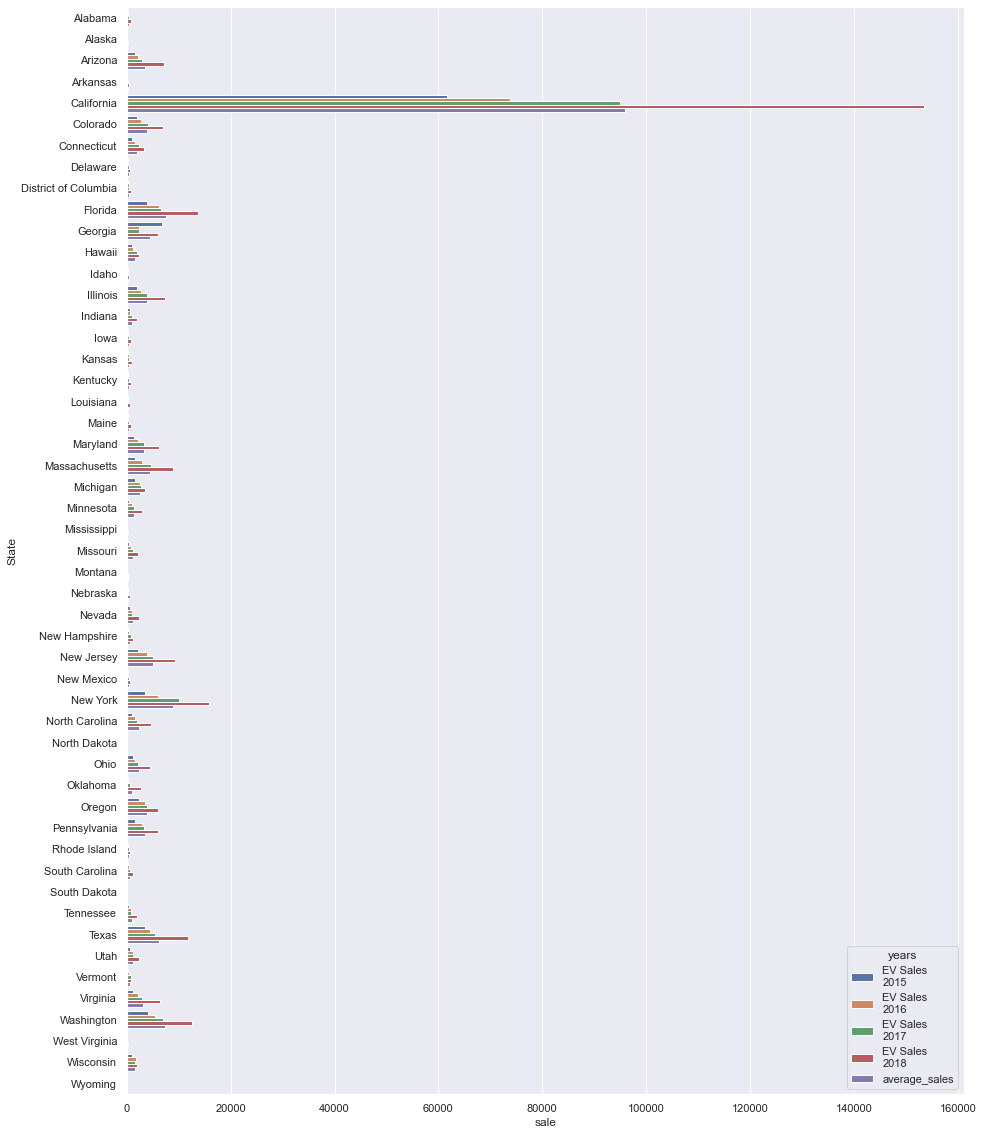

In [127]:
# Compute average sales and add to df
if 'average_sales' not in df:
    df.insert(5, 'average_sales', df.iloc[:,1:5].mean(axis=1).to_frame())
    df['average_sales'] = df['average_sales'].astype(int)
# Plot state sales data
sales_data = df.iloc[:,1:6]
sales_data['State'] = sales_data.index.get_level_values('State')
x=pd.melt(sales_data,id_vars="State", var_name="years", value_name="sale")
y=x.groupby(["State","years"]).sum()
y['State'] = y.index.get_level_values('State')
y['years'] = y.index.get_level_values('years')
plt.figure(figsize=(15,20))
sns.barplot(x='sale', y='State', hue="years",data=y)

In [128]:
stateDict = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [129]:
df = pd.read_csv('ECE 143.csv')

df['StateAbbreviation'] = df['State'].map(stateDict)

if 'average_sales' not in df:
    df.insert(5, 'average_sales', df.iloc[:,2:6].mean(axis=1).to_frame())
    df.insert(6,'total_sales',df.iloc[:,2:6].sum(axis = 1).to_frame())
    df['average_sales'] = df['average_sales'].astype(int)
    df['total_sales'] = df['total_sales'].astype(int)
    df['averageSales_Population'] = df['average_sales']/df['Population']
    df['averageSales_TotalSales'] = df['average_sales']/df['total_sales']
    
dfSub = df[['average_sales','StateAbbreviation','EV Sales\n2018','EV Sales\n2017','EV Sales\n2016','EV Sales\n2015']]

us_states = gpd.read_file("shape files/cb_2018_us_state_20m.shp")
us_states.drop(index = [7,25,48], inplace = True)

In [130]:

df.set_index(["State"], inplace=True)

us_states_plot = pd.merge(us_states,dfSub,left_on='STUSPS',right_on='StateAbbreviation')
us_states_plot["center"] = us_states_plot["geometry"].centroid
us_states_plot_points = us_states_plot.copy()
us_states_plot_points.set_geometry("center", inplace = True)

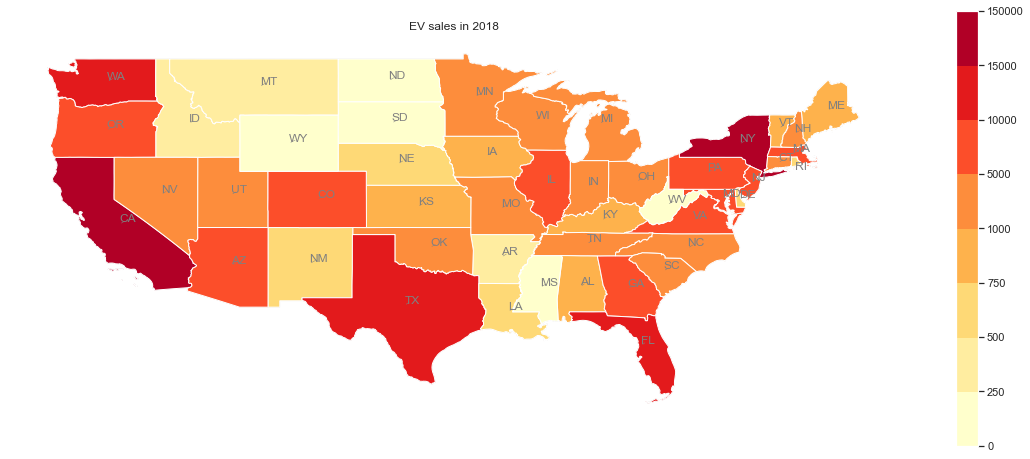

In [131]:
from matplotlib.colors import BoundaryNorm, ListedColormap
cmap = ListedColormap(["#ffffcc", "#ffeda0", "#fed976", "#feb24c", "#fd8d3c", "#fc4e2a", "#e31a1c","#b10026"])

bounds = [0,250,500,750,1000,5000,10000,15000,150000]
norm = BoundaryNorm(bounds, cmap.N)
texts = []
ax = us_states_plot.geometry.plot(figsize = (20, 16), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
for x, y, label in zip(us_states_plot_points.geometry.x, us_states_plot_points.geometry.y, us_states_plot_points["STUSPS"]):
    texts.append(plt.text(x, y, label, color='grey', fontsize = 12))
aT.adjust_text(texts, force_points=0.3, force_text=1, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
us_states_plot.plot(column = 'EV Sales\n2018', legend_kwds={'shrink': 0.5}, legend=True, ax=ax, cmap=cmap, norm=norm)
ax.axis('off')
ax.set_title("EV sales in 2018")
None
f = plt.gcf()
f.savefig('2018_sales.jpg')

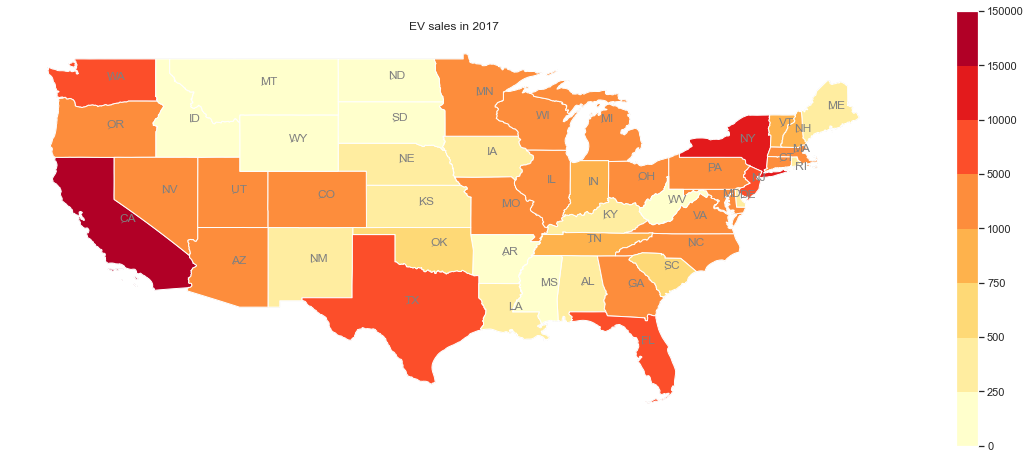

In [132]:
from matplotlib.colors import BoundaryNorm, ListedColormap
cmap = ListedColormap(["#ffffcc", "#ffeda0", "#fed976", "#feb24c", "#fd8d3c", "#fc4e2a", "#e31a1c","#b10026"])
bounds = [0,250,500,750,1000,5000,10000,15000,150000]
norm = BoundaryNorm(bounds, cmap.N)
texts = []
ax = us_states_plot.geometry.plot(figsize = (20, 16), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
for x, y, label in zip(us_states_plot_points.geometry.x, us_states_plot_points.geometry.y, us_states_plot_points["STUSPS"]):
    texts.append(plt.text(x, y, label, color='grey', fontsize = 12))
aT.adjust_text(texts, force_points=0.3, force_text=1, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
us_states_plot.plot(column = 'EV Sales\n2017', legend_kwds={'shrink': 0.5}, legend=True, ax=ax, cmap=cmap, norm=norm)
ax.axis('off')
ax.set_title("EV sales in 2017")
None
f = plt.gcf()
f.savefig('2017_sales.jpg')

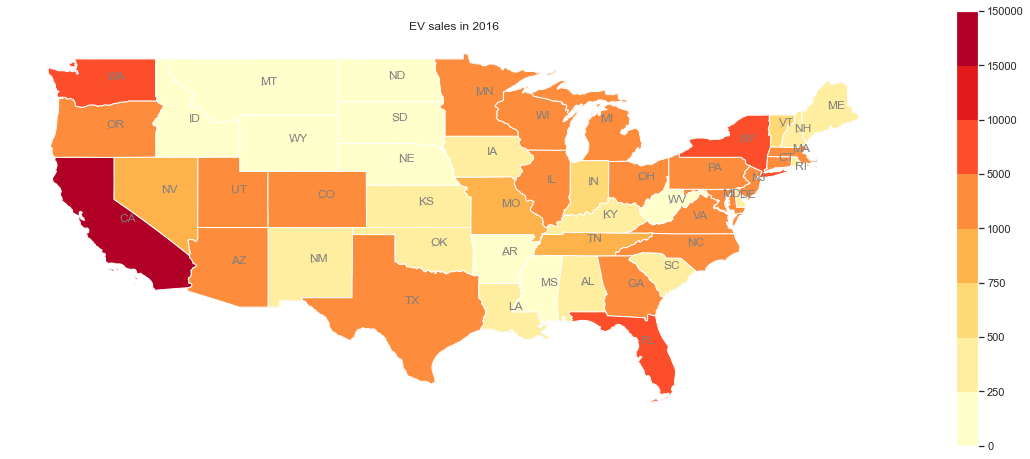

In [133]:
from matplotlib.colors import BoundaryNorm, ListedColormap
cmap = ListedColormap(["#ffffcc", "#ffeda0", "#fed976", "#feb24c", "#fd8d3c", "#fc4e2a", "#e31a1c","#b10026"])
bounds = [0,250,500,750,1000,5000,10000,15000,150000]
norm = BoundaryNorm(bounds, cmap.N)
texts = []
ax = us_states_plot.geometry.plot(figsize = (20, 16), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
for x, y, label in zip(us_states_plot_points.geometry.x, us_states_plot_points.geometry.y, us_states_plot_points["STUSPS"]):
    texts.append(plt.text(x, y, label, color='grey', fontsize = 12))
aT.adjust_text(texts, force_points=0.3, force_text=1, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
us_states_plot.plot(column = 'EV Sales\n2016', legend_kwds={'shrink': 0.5}, legend=True, ax=ax, cmap=cmap, norm=norm)
ax.axis('off')
ax.set_title("EV sales in 2016")
None
f = plt.gcf()
f.savefig('2016_sales.jpg')

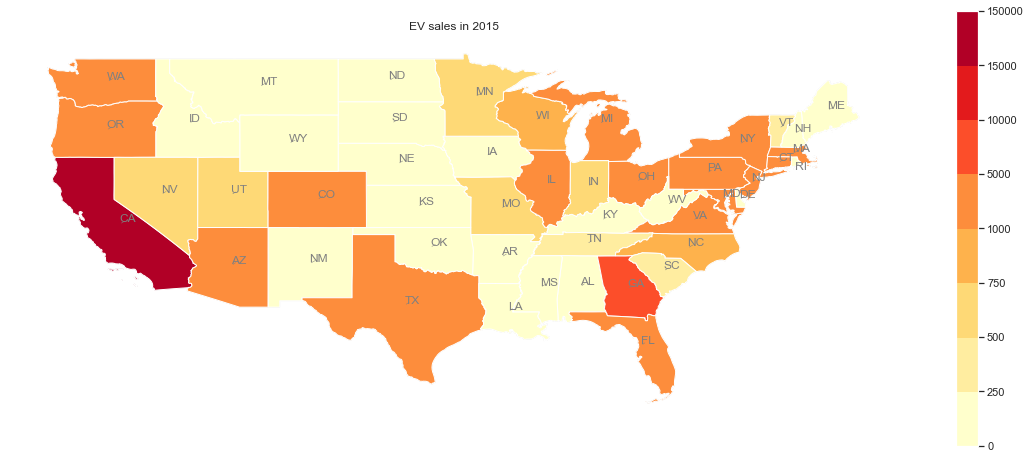

In [134]:
from matplotlib.colors import BoundaryNorm, ListedColormap
cmap = ListedColormap(["#ffffcc", "#ffeda0", "#fed976", "#feb24c", "#fd8d3c", "#fc4e2a", "#e31a1c","#b10026"])
bounds = [0,250,500,750,1000,5000,10000,15000,150000]
norm = BoundaryNorm(bounds, cmap.N)
texts = []
ax = us_states_plot.geometry.plot(figsize = (20, 16), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
for x, y, label in zip(us_states_plot_points.geometry.x, us_states_plot_points.geometry.y, us_states_plot_points["STUSPS"]):
    texts.append(plt.text(x, y, label, color='grey', fontsize = 12))
aT.adjust_text(texts, force_points=0.3, force_text=1, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
us_states_plot.plot(column = 'EV Sales\n2015', legend_kwds={'shrink': 0.5}, legend=True, ax=ax, cmap=cmap, norm=norm)
ax.axis('off')
ax.set_title("EV sales in 2015")
None
f = plt.gcf()
f.savefig('2015_sales.jpg')

In [135]:
sales_2018 = np.array(df[['EV Sales\n2018']])
sales_2015 = np.array(df[['EV Sales\n2015']])
df['percent_Increase_in_sales_2015_2018'] = (sales_2018 - sales_2015)/(sales_2018)
dfPrct = df[["StateAbbreviation","percent_Increase_in_sales_2015_2018"]]
us_states_plot = pd.merge(us_states_plot,dfPrct,on = 'StateAbbreviation')

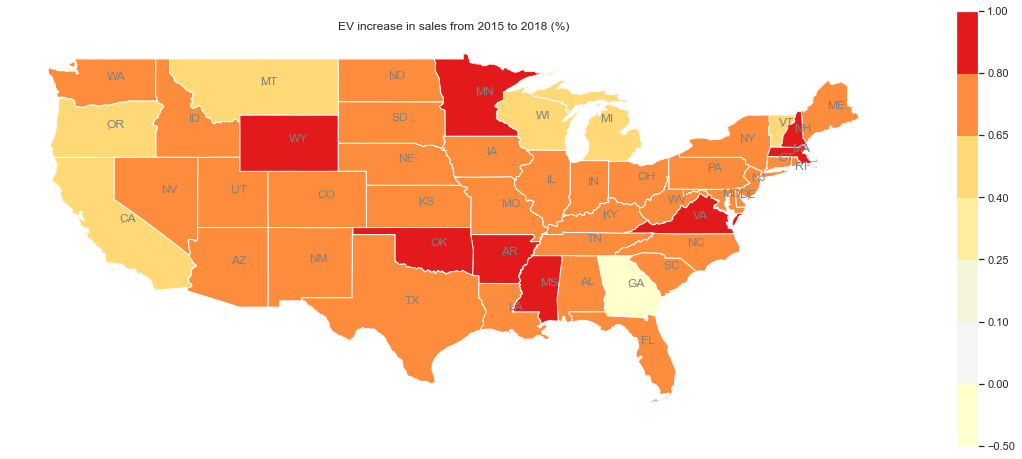

In [136]:
from matplotlib.colors import BoundaryNorm, ListedColormap

cmap = ListedColormap(["#ffffcc", "whitesmoke", "beige", "#ffeda0", "#fed976", "#fd8d3c","#e31a1c"])
bounds = [-0.5,0,0.1,0.25,0.4,0.65,0.8,1]
norm = BoundaryNorm(bounds, cmap.N)
texts = []
ax = us_states_plot.geometry.plot(figsize = (20, 16), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
for x, y, label in zip(us_states_plot_points.geometry.x, us_states_plot_points.geometry.y, us_states_plot_points["STUSPS"]):
    texts.append(plt.text(x, y, label, color='grey', fontsize = 12))
aT.adjust_text(texts,color = 'green', force_points=0.3, force_text=1, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
us_states_plot.plot(column = 'percent_Increase_in_sales_2015_2018', legend_kwds={'shrink': 0.5}, legend=True, ax=ax, cmap=cmap, norm=norm)
ax.axis('off')
ax.set_title("EV increase in sales from 2015 to 2018 (%)")
None
f = plt.gcf()
f.savefig('2018-2015_sales.jpg')

In [137]:
df_master = pd.read_csv('ECE 143.csv')

if 'average_sales' not in df_master:
    df_master.insert(5, 'average_sales', df_master.iloc[:,1:5].mean(axis=1).to_frame())
    df_master['average_sales'] = df_master['average_sales'].astype(int)


# Adjust columns names
df_master.rename(columns={"Avg/C": "Average temperature(Celsius)",
                   "Median Household Income\t $": "Median Household Income", 
                   "% Libertarian/ Independent Representation": "% Libertarian/Independent Representation",
                   "% High school graduate\nor higher": "% High school graduate or higher",
                   "% Bachelor's degree\nor higher": "% Bachelor's degree or higher",
                   "Avg gasoline price per gallon": "Average gasoline price per gallon",
                   "COMMUTE TIME": "Commute time",
                   "PUBLIC TRANSIT USAGE": "Public transit usage",
                   "ROAD QUALITY": "Road quality",
                   "BRIDGE QUALITY": "Bridge quality",
                   "EV Sales\n2015": "EV Sales 2015",
                   "EV Sales\n2016": "EV Sales 2016",
                   "EV Sales\n2017": "EV Sales 2017",
                   "EV Sales\n2018": "EV Sales 2018",                   
                   "EV Sales\n2015 % of Total": "EV Sales 2015 % of Total",
                   "EV Sales\n2016 % of Total": "EV Sales 2016 % of Total",
                   "EV Sales\n2017 % of Total": "EV Sales 2017 % of Total",
                   "EV Sales\n2018 % of Total": "EV Sales 2018 % of Total",                             
                   "2015 EV\nMarket Share\nW/in State": "2015 EV market share within state",              
                   "2016 EV\nMarket Share\nW/in State": "2016 EV market share within state",                   
                   "2017 EV\nMarket Share\nW/in State": "2017 EV market share within state",
                   "2018 EV\nMarket Share\nW/in State": "2018 EV market share within state"
                   }, inplace=True)

stateDict = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'District of Columbia': 'DC',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
df_master['StateAbbreviation'] = df_master['State'].map(stateDict)
df_master.set_index(["State"], inplace=True)
df_master = df_master.drop("California") 
df_master = df_master.drop("District of Columbia")
df = df_master.iloc[:,13:33].copy()
print(df_master['average_sales'])
# print(df)

State
Alabama           1226023
Alaska             182946
Arizona           1821404
Arkansas           754551
Colorado          1441875
Connecticut        892529
Delaware           243671
Florida           5373601
Georgia           2657278
Hawaii             355015
Idaho              446917
Illinois          3170093
Indiana           1683630
Iowa               789002
Kansas             728587
Kentucky          1117119
Louisiana         1162372
Maine              336297
Maryland          1513138
Massachusetts     1725426
Michigan          2498421
Minnesota         1410662
Mississippi        744097
Missouri          1534992
Montana            267286
Nebraska           483756
Nevada             770707
New Hampshire      340298
New Jersey        2223324
New Mexico         524405
New York          4868308
North Carolina    2623190
North Dakota       190541
Ohio              2923500
Oklahoma           989536
Oregon            1056885
Pennsylvania      3202488
Rhode Island       265059
South 

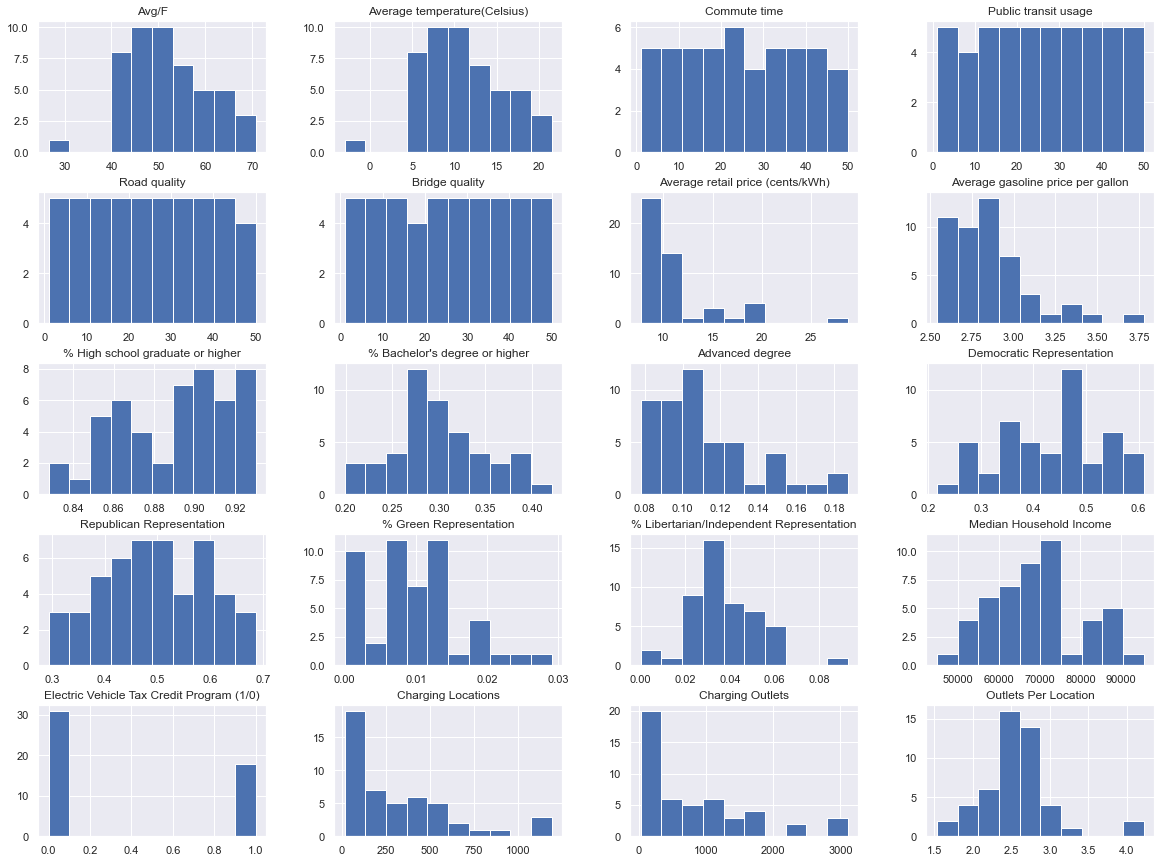

In [138]:
import matplotlib.pyplot as plt 
df.hist(figsize=(20,15))
plt.show()

[<AxesSubplot:xlabel="% Bachelor's degree or higher", ylabel='Commute time (rank)'>, <AxesSubplot:label='<colorbar>', ylabel='average_sales'>]


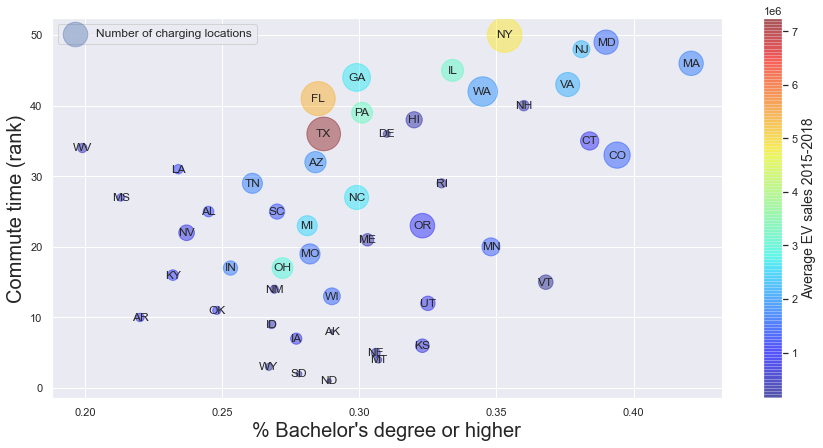

In [139]:

fig, ax = plt.subplots(figsize=(15,7))
df_master.plot(kind="scatter", x="% Bachelor's degree or higher", y="Commute time", alpha=0.4,
              s=df_master["Charging Locations"], label="Number of charging locations", 
              c="average_sales", cmap=plt.get_cmap("jet"), colorbar=True, ax=ax)
ax.legend(loc="upper left", fontsize=12)
plt.xlabel("% Bachelor's degree or higher",fontsize=20)
plt.ylabel("Commute time (rank)",fontsize=20)

f = plt.gcf()
print(f.get_axes())
cax = f.get_axes()[1]
cax.set_ylabel('Average EV sales 2015-2018', fontsize=14)
for i, txt in enumerate(df_master["StateAbbreviation"]):
    ax.annotate(txt, (df_master["% Bachelor's degree or higher"][i], df_master["Commute time"][i]), ha='center', va='center')
    
fig.savefig('bachelor_vs_commute.jpg')

[<AxesSubplot:xlabel='% Democratic Representation', ylabel="% Bachelor's degree or higher">, <AxesSubplot:label='<colorbar>', ylabel='average_sales'>]


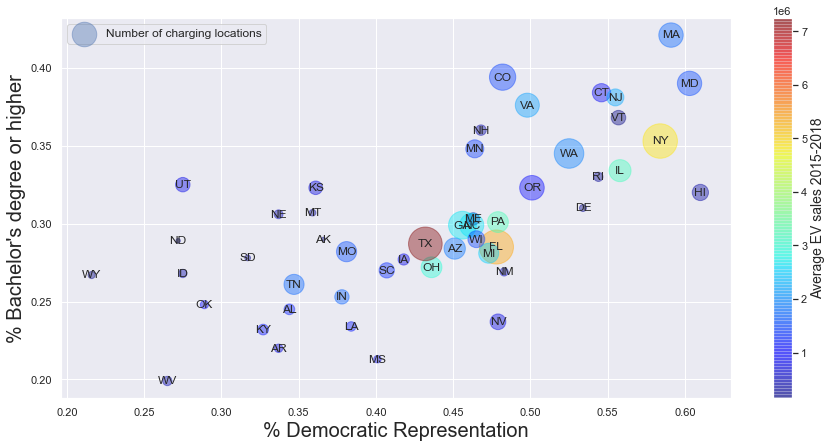

In [140]:
fig, ax = plt.subplots(figsize=(15,7))
ax = df_master.plot(kind="scatter",x="Democratic Representation", y="% Bachelor's degree or higher", alpha=0.4,
              s=df_master["Charging Locations"], label="Number of charging locations", ax=ax, 
              c="average_sales", cmap=plt.get_cmap("jet"), colorbar=True)
ax.legend(loc="upper left", fontsize=12)
plt.xlabel("% Democratic Representation",fontsize=20)
plt.ylabel("% Bachelor's degree or higher",fontsize=20)

f = plt.gcf()
print(f.get_axes())
cax = f.get_axes()[1]
cax.set_ylabel('Average EV sales 2015-2018', fontsize=14)
for i, txt in enumerate(df_master["StateAbbreviation"]):
    ax.annotate(txt, (df_master["Democratic Representation"][i], df_master["% Bachelor's degree or higher"][i]), ha='center', va='center')
fig.savefig('bachelor_vs_democrat.jpg')

[<AxesSubplot:xlabel='% Republican Representation', ylabel="% Bachelor's degree or higher">, <AxesSubplot:label='<colorbar>', ylabel='average_sales'>]


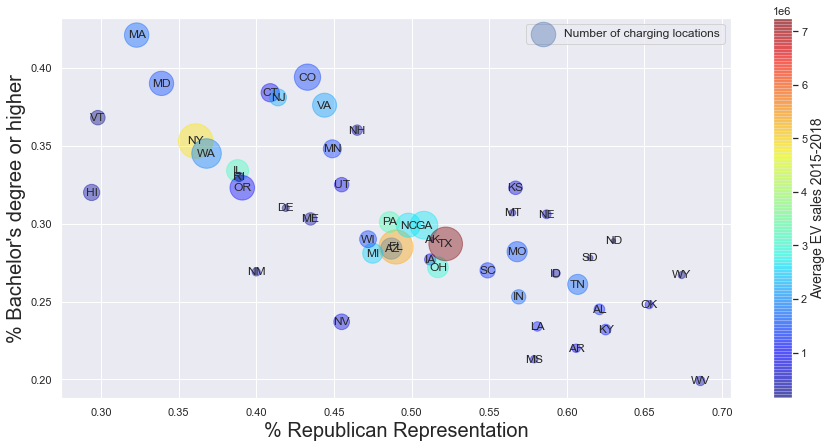

In [141]:
fig, ax = plt.subplots(figsize=(15,7))
ax = df_master.plot(kind="scatter",x="Republican Representation", y="% Bachelor's degree or higher", alpha=0.4,
              s=df_master["Charging Locations"], label="Number of charging locations", ax=ax, 
              c="average_sales", cmap=plt.get_cmap("jet"), colorbar=True)
ax.legend(loc="upper right", fontsize=12)
plt.xlabel("% Republican Representation",fontsize=20)
plt.ylabel("% Bachelor's degree or higher",fontsize=20)

f = plt.gcf()
print(f.get_axes())
cax = f.get_axes()[1]
cax.set_ylabel('Average EV sales 2015-2018', fontsize=14)
for i, txt in enumerate(df_master["StateAbbreviation"]):
    ax.annotate(txt, (df_master["Republican Representation"][i], df_master["% Bachelor's degree or higher"][i]), ha='center', va='center')
fig.savefig('bachelor_vs_republican.jpg')

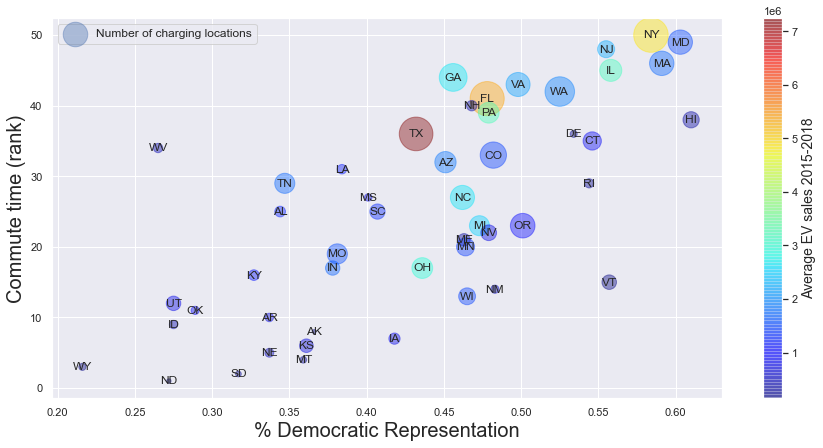

In [142]:
fig, ax = plt.subplots(figsize=(15,7))
ax = df_master.plot(kind="scatter", x="Democratic Representation", y="Commute time", alpha=0.4,
              s=df_master["Charging Locations"], label="Number of charging locations", ax=ax, 
              c="average_sales", cmap=plt.get_cmap("jet"), colorbar=True)
ax.legend(loc="upper left", fontsize=12)
plt.xlabel("% Democratic Representation",fontsize=20)
plt.ylabel("Commute time (rank)",fontsize=20)
f = plt.gcf()
cax = f.get_axes()[1]
cax.set_ylabel('Average EV sales 2015-2018', fontsize=14)
for i, txt in enumerate(df_master["StateAbbreviation"]):
    ax.annotate(txt, (df_master["Democratic Representation"][i], df_master["Commute time"][i]), ha='center', va='center')
fig.savefig('democrat_vs_commute.jpg')

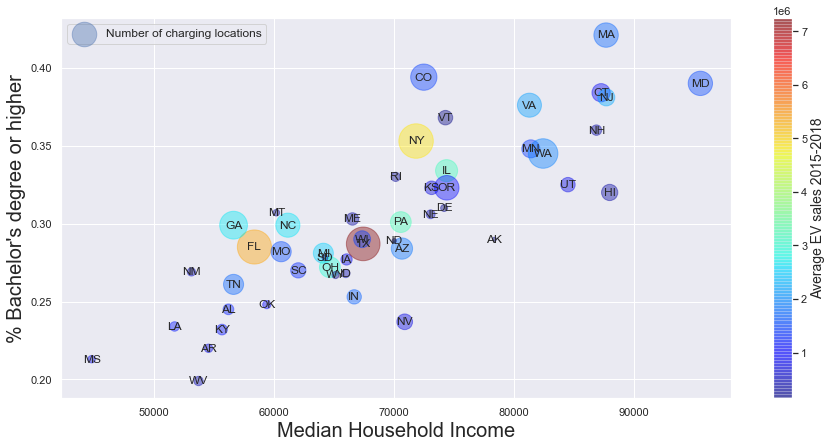

In [143]:
fig, ax = plt.subplots(figsize=(15,7))
ax = df_master.plot(kind="scatter",x="Median Household Income", y="% Bachelor's degree or higher", alpha=0.4,
              s=df_master["Charging Locations"], label="Number of charging locations", ax=ax, 
              c="average_sales", cmap=plt.get_cmap("jet"), colorbar=True)
ax.legend(loc="upper left", fontsize=12)
plt.xlabel("Median Household Income",fontsize=20)
plt.ylabel("% Bachelor's degree or higher",fontsize=20)

f = plt.gcf()
cax = f.get_axes()[1]
cax.set_ylabel('Average EV sales 2015-2018', fontsize=14)
for i, txt in enumerate(df_master["StateAbbreviation"]):
    ax.annotate(txt, (df_master["Median Household Income"][i], df_master["% Bachelor's degree or higher"][i]), ha='center', va='center')
fig.savefig('income_vs_bachelor.jpg')

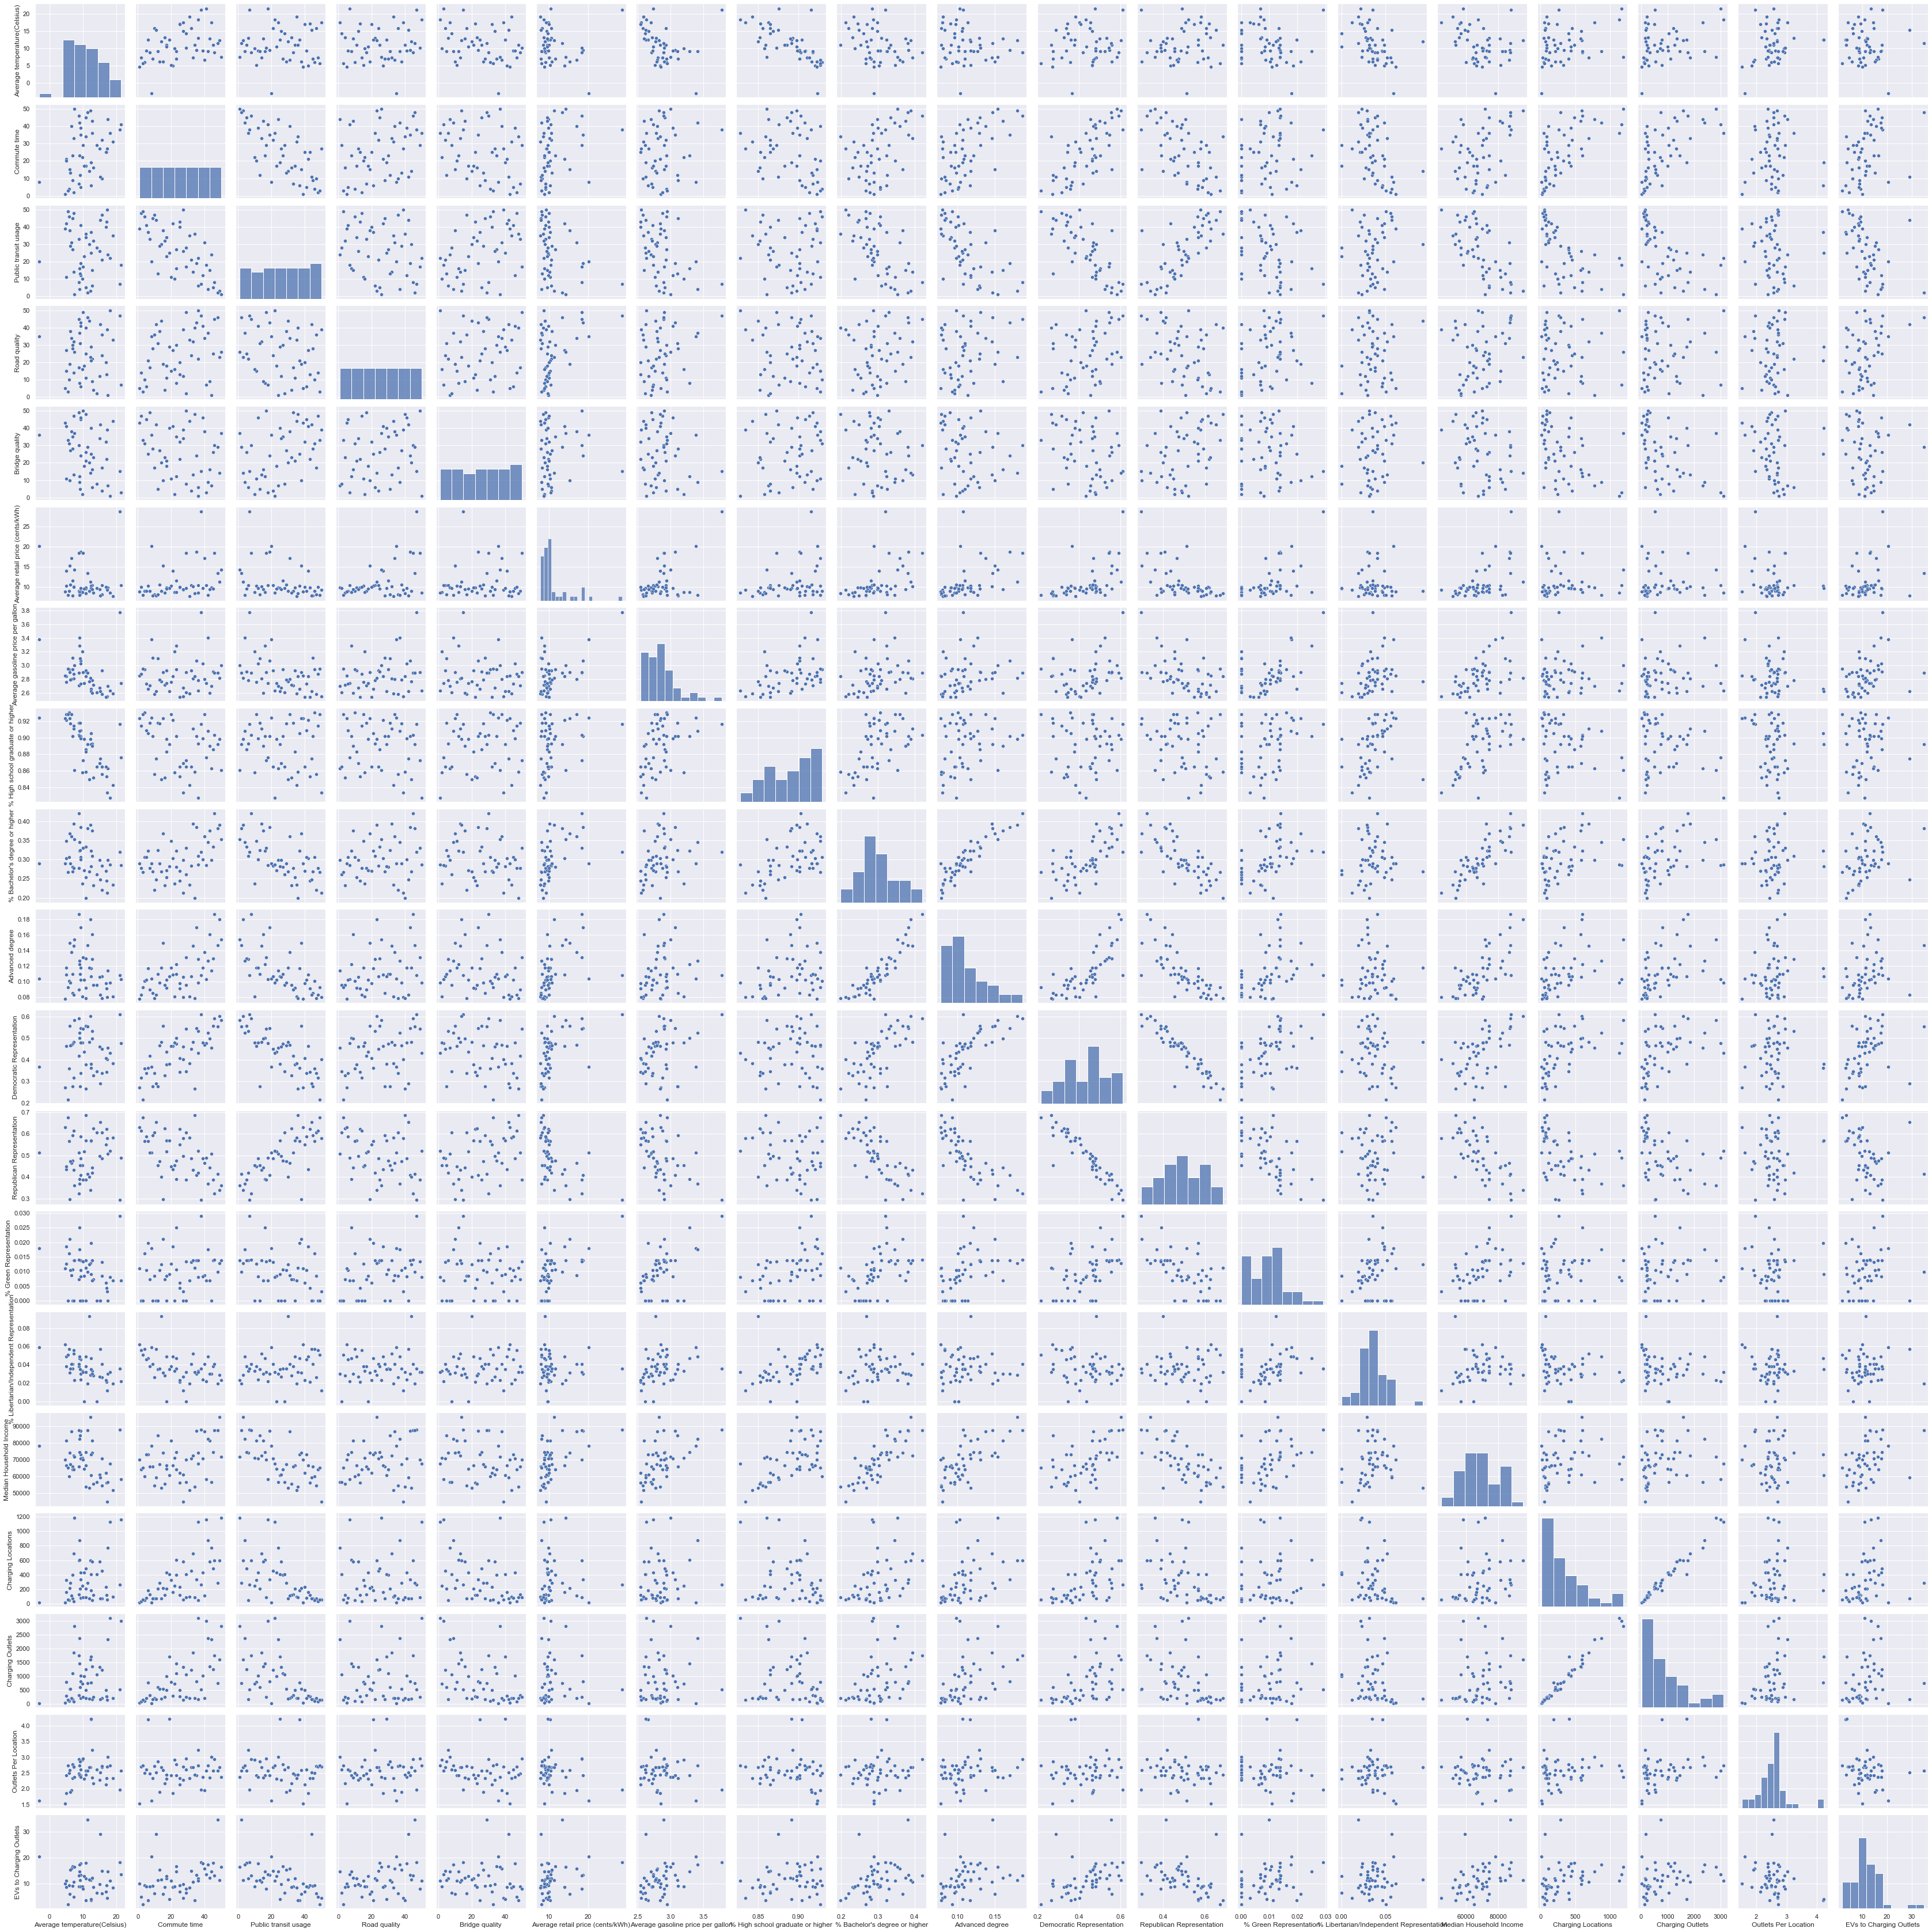

In [144]:
numericalSubset = ['Average temperature(Celsius)', 'Commute time','Public transit usage','Road quality','Bridge quality','Average retail price (cents/kWh)','Average gasoline price per gallon',
             '% High school graduate or higher',"% Bachelor's degree or higher",'Advanced degree','Democratic Representation','Republican Representation',
             '% Green Representation','% Libertarian/Independent Representation','Median Household Income','Charging Locations',
             'Charging Outlets','Outlets Per Location','EVs to Charging Outlets']
subset = df_master[numericalSubset]
sns.pairplot(subset,vars = numericalSubset,diag_kind='hist')

# Linear regression

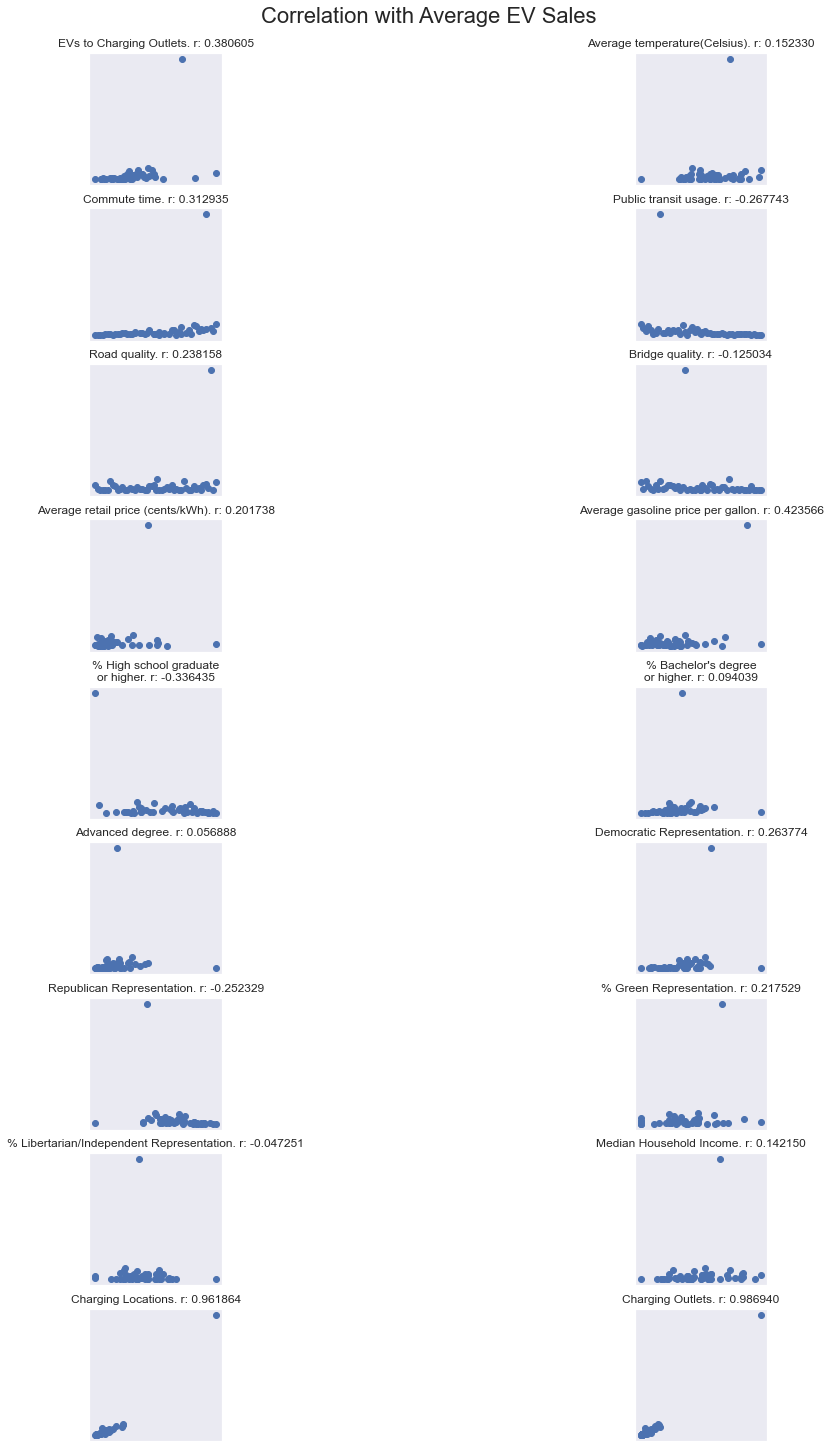

In [146]:
df = pd.read_csv('ECE 143.csv')
df.set_index(["State"], inplace=True)
if 'average_sales' not in df:
    df.insert(5, 'average_sales', df.iloc[:,1:5].mean(axis=1).to_frame())
    df['average_sales'] = df['average_sales'].astype(int)
# Plot state sales data
sales_data = df.iloc[:,1:6]
sales_data['State'] = sales_data.index.get_level_values('State')
x=pd.melt(sales_data,id_vars="State", var_name="years", value_name="sale")
y=x.groupby(["State","years"]).sum()
y['State'] = y.index.get_level_values('State')
y['years'] = y.index.get_level_values('years')
# Adjust columns names
df.rename(columns={"Avg/C": "Average temperature(Celsius)",
                   "Median Household Income\t $": "Median Household Income", 
                   "% Libertarian/ Independent Representation": "% Libertarian/Independent Representation",
                   "Avg gasoline price per gallon": "Average gasoline price per gallon",
                   "COMMUTE TIME": "Commute time",
                   "PUBLIC TRANSIT USAGE": "Public transit usage",
                   "ROAD QUALITY": "Road quality",
                   "BRIDGE QUALITY": "Bridge quality"
                   }, inplace=True)

# Correlation plot between average sales and continuous features
avg_sales = df['average_sales']
# avg_sales = df['Avg % of Total Sales 2015-2018']
# avg_sales.apply(lambda x : (x-avg_sales.mean())/avg_sales.std())
cont_features = ['Average temperature(Celsius)', 'Commute time','Public transit usage','Road quality','Bridge quality','Average retail price (cents/kWh)','Average gasoline price per gallon',
             '% High school graduate\nor higher',"% Bachelor's degree\nor higher",'Advanced degree','Democratic Representation','Republican Representation',
             '% Green Representation','% Libertarian/Independent Representation','Median Household Income','Charging Locations',
             'Charging Outlets','Outlets Per Location','EVs to Charging Outlets']
cont_cols = df.loc[:,cont_features]
cont_cols.columns = cont_features
fig, axs = plt.subplots(9, 2,figsize=(15,20),constrained_layout=True)
fig.suptitle("Correlation with Average EV Sales",fontsize=22)
# fig.suptitle("Correlation with Average EV market share",fontsize=22)
for i in range(18):
    r = i//2
    c = i%2
    # get feature, normalize and plot
    col = cont_cols.iloc[:,i-1].astype(float)
    col=col.apply(lambda x : (x-col.mean())/col.std())
    axs[r, c].plot(col.iloc[:], avg_sales.iloc[:], 'bo')
    # set plot title, showing correlation value
    corr = avg_sales.corr(col)
    axs[r, c].set_title("{}. r: {:2f}".format(col.name,corr))
    # format plot
    axs[r, c].xaxis.set_visible(False)
    axs[r, c].yaxis.set_visible(False)
    x0,x1 = axs[r, c].get_xlim()
    y0,y1 = axs[r, c].get_ylim()
    axs[r, c].set_aspect(abs(x1-x0)/abs(y1-y0))

Commute time, public transit usage, charging locations, charing outlets, democratic representation has |correlation score| > 0.5.  
--> Use for linear regression

Linear Regression score: 0.8940991176845242
Weights:
Commute time: 0.0026983513452960655
Public transit usage: -0.0062208891647492414
Charging Locations: 0.04916778973601992
Charging Outlets: -0.01660344166449759
Democratic Representation: -0.0017167132249041562
Bias: 0.0034007887604487422

Test set performance
                true_labels  prediction
State                                  
New Hampshire        0.0032    0.001193
Hawaii               0.0087    0.004697
Georgia              0.0271    0.007131
Michigan             0.0142    0.002788
Arizona              0.0169    0.004713
Nevada               0.0063    0.003872
Vermont              0.0033   -0.001124
New York             0.0436    0.013452
Montana              0.0008   -0.002820
California           0.5059    0.035606
North Carolina       0.0113    0.004810
Test score: -0.004185489727969838
Mean squared error: 0.020260307680574758

Predict 2018 Sales
Prediction score: 0.09293571893264718
Mean squared error: 0.003766234141

Text(0, 0.5, 'Value')

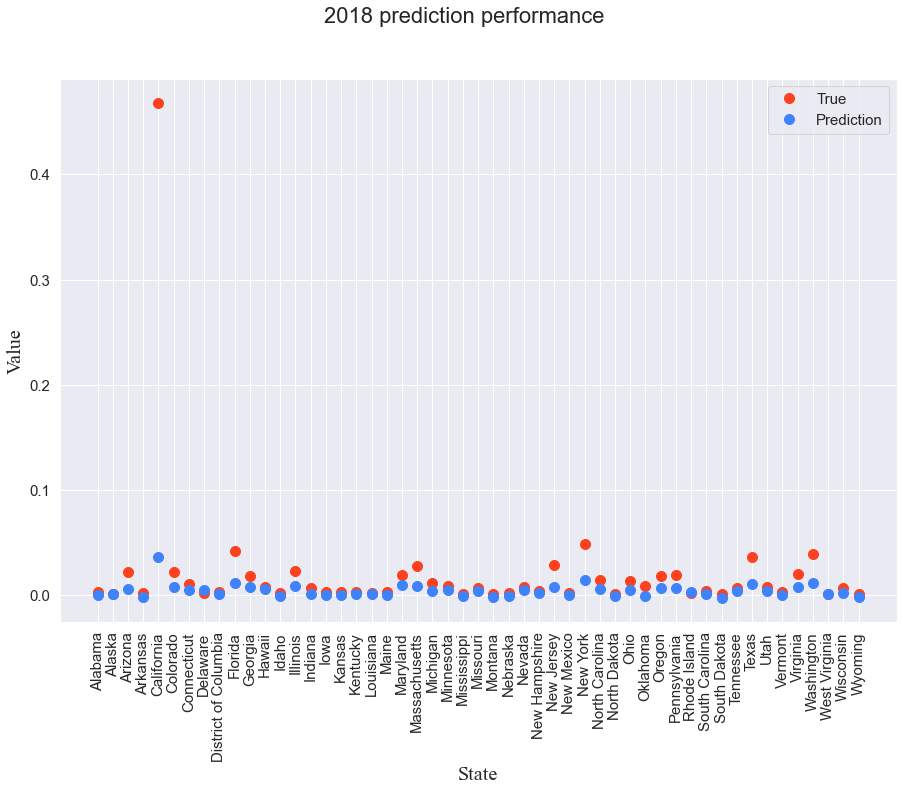

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statistics as stats
# To try using ev_market_share or avg_sale/population as labels, uncomment the line below
# Y = df["average_sales"]
# Y_2018 = df["EV Sales\n2018"]
Y = df['Avg % of Total Sales 2015-2018']
Y_2018 = df["EV Sales\n2018 % of Total"]
# Y = df["average_sales"]/df["Population"]
X = df.loc[:,['Commute time','Public transit usage','Charging Locations', 'Charging Outlets', 'Democratic Representation']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# scale data
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(x_train)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Fit data and print coefficients
lrModel = LinearRegression()
x = X_scaled
y = y_train
lrModel.fit(x,y)
print("Linear Regression score: " + str(lrModel.score(x,y)))
print("Weights:")
for i in range(len(X.columns)):
    print("{}: {}".format(X.columns[i], lrModel.coef_[i]))
print("Bias: " + str(lrModel.intercept_))

x_test_scaled = min_max_scaler.fit_transform(x_test)
pred = lrModel.predict(x_test_scaled)
result = pd.DataFrame({ 'true_labels': y_test, 'prediction': pred }) 
print("\nTest set performance")
print(result)
print("Test score: " + str(lrModel.score(x_test_scaled,y_test)))
print("Mean squared error: {}".format(stats.mean([(y_test[i]-pred[i])**2 for i in range(len(pred))])))


print("\nPredict 2018 Sales")
X = df.loc[:,['Commute time','Public transit usage','Charging Locations', 'Charging Outlets', 'Democratic Representation']]
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
pred = lrModel.predict(X_scaled)
# result = pd.DataFrame({ 'true_labels': Y_2018, 'prediction': pred }) 
# print(result)
print("Prediction score: " + str(lrModel.score(X_scaled,Y_2018)))
print("Mean squared error: {}".format(stats.mean([(Y_2018[i]-pred[i])**2 for i in range(len(pred))])))


sns.set(color_codes=True)
plt.figure(figsize=(15,10))
plt.plot(Y_2018, 'bx', label='truth',markersize=10.,marker='o',c=sns.xkcd_rgb['orange red'])
plt.plot(pred, 'rx', label='prediction',markersize=10.,marker='o',c=sns.xkcd_rgb['dodger blue'])
plt.legend(labels=['True','Prediction'],loc='best',prop = {'size':15})

font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 20,
}
plt.suptitle("2018 prediction performance",fontsize=22)
plt.xticks(rotation=90,fontsize = 15,alpha=2.0)
plt.yticks(fontsize = 15,alpha=2.0)
plt.xlabel('State',font2)
plt.ylabel('Value',font2)

# Prediction based on Decision Tree

In [148]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image, display
tree_reg_2 = DecisionTreeRegressor(max_depth=2)
tree_reg_2.fit(x_train,y_train)
export_graphviz( tree_reg_2,
out_file="decisionTree/ev_tree_max_depth_2.dot", feature_names=list(x.columns))

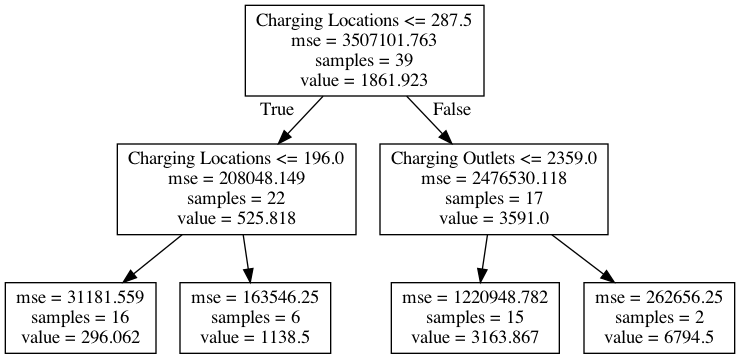

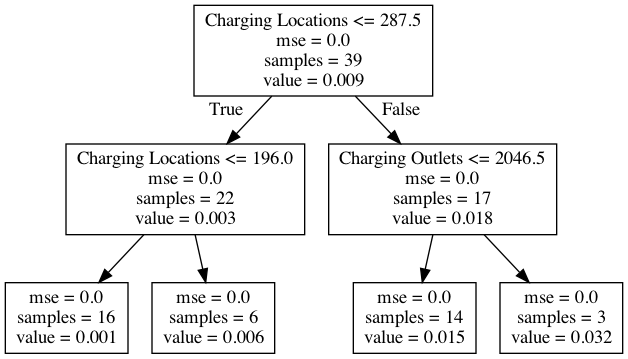


Test set performance
                true_labels  prediction
State                                  
New Hampshire        0.0032    0.003272
Hawaii               0.0087    0.003272
Georgia              0.0271    0.035767
Michigan             0.0142    0.003272
Arizona              0.0169    0.018757
Nevada               0.0063    0.003272
Vermont              0.0033    0.003272
New York             0.0436    0.035767
Montana              0.0008    0.003272
California           0.5059    0.035767
North Carolina       0.0113    0.018757
Mean squared error: 0.020125912476165474


In [149]:
display(Image(filename='decisionTree/ev_tree_2_avg_sales.png'))
display(Image(filename='decisionTree/ev_tree_2_market_share.png'))
print("\nTest set performance")
pred = tree_reg_2.predict(x_test)
result = pd.DataFrame({ 'true_labels': y_test, 'prediction': pred })
print(result)

print("Mean squared error: {}".format(stats.mean([(y_test[i]-pred[i])**2 for i in range(len(pred))])))

In [150]:
tree_reg_3 = DecisionTreeRegressor(max_depth=3)
tree_reg_3.fit(x_train, y_train)
export_graphviz( tree_reg_3,
out_file="decisionTree/ev_tree_max_depth_3.dot", feature_names=list(x.columns))

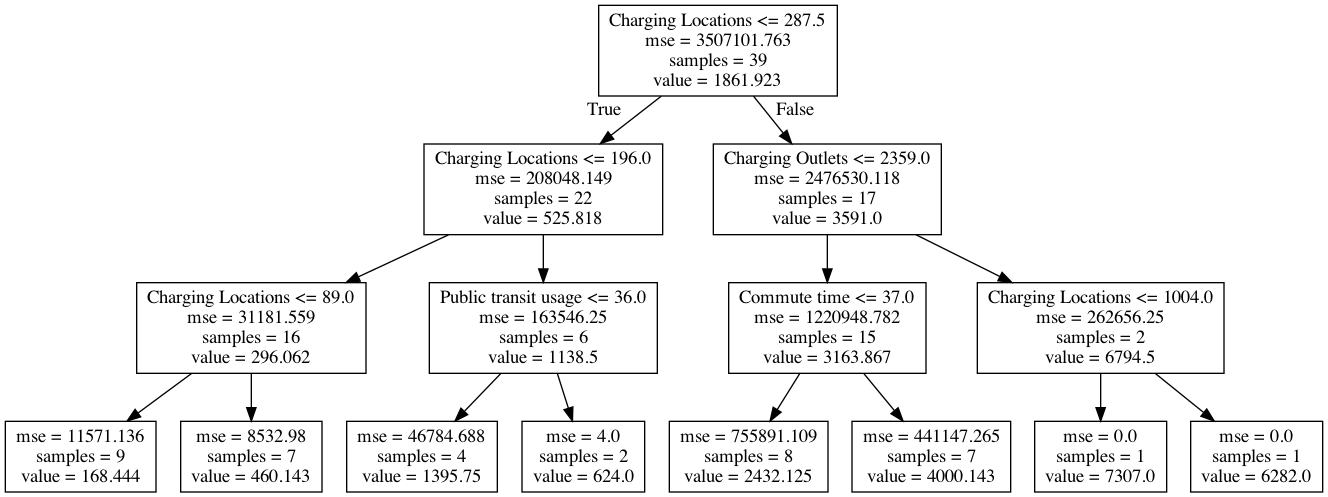

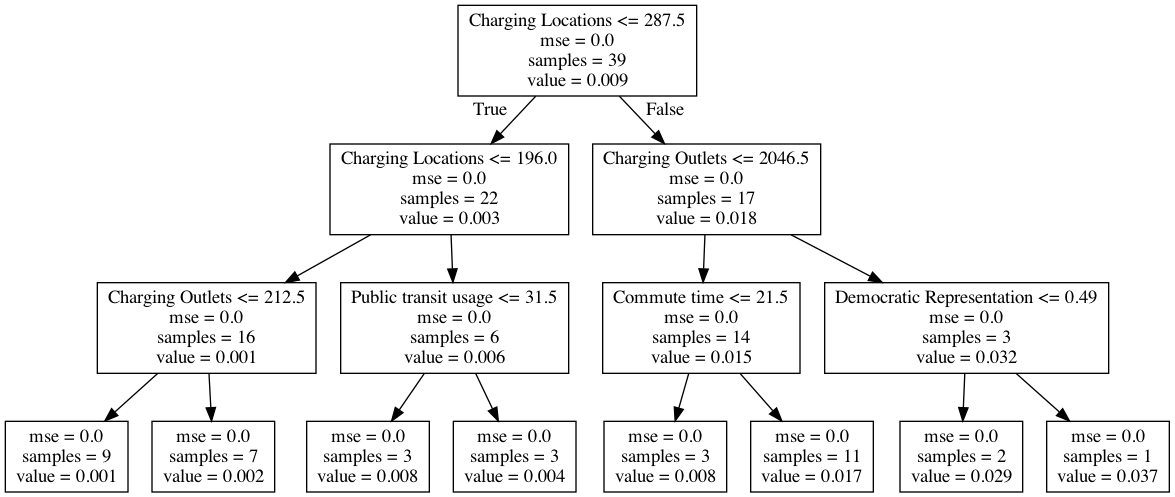


Test set performance
                true_labels  prediction
State                                  
New Hampshire        0.0032    0.001535
Hawaii               0.0087    0.007133
Georgia              0.0271    0.037900
Michigan             0.0142    0.007133
Arizona              0.0169    0.017225
Nevada               0.0063    0.007133
Vermont              0.0033    0.007133
New York             0.0436    0.037900
Montana              0.0008    0.001535
California           0.5059    0.031500
North Carolina       0.0113    0.017225
Mean squared error: 0.02048279952828283


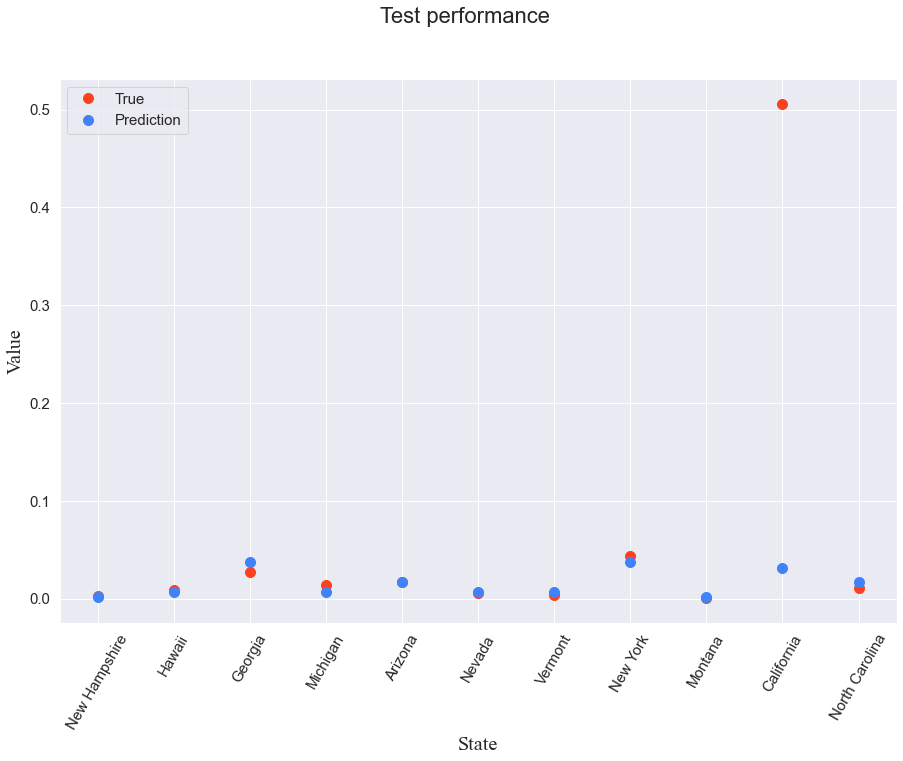

In [151]:
display(Image(filename='decisionTree/ev_tree_3_avg_sales.png'))
display(Image(filename='decisionTree/ev_tree_3_market_share.png'))
print("\nTest set performance")
pred = tree_reg_3.predict(x_test)
result = pd.DataFrame({ 'true_labels': y_test, 'prediction': pred })
print(result)
sns.set(color_codes=True)
plt.figure(figsize=(15,10))
plt.plot(y_test, 'bx', label='truth',markersize=10.,marker='o',c=sns.xkcd_rgb['orange red'])
plt.plot(pred, 'rx', label='prediction',markersize=10.,marker='o',c=sns.xkcd_rgb['dodger blue'])
plt.legend(labels=['True','Prediction'],loc='best',prop = {'size':15})

font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 20,
}
plt.suptitle("Test performance",fontsize=22)
plt.xticks(rotation=60,fontsize = 15,alpha=2.0)
plt.yticks(fontsize = 15,alpha=2.0)
plt.xlabel('State',font2)
plt.ylabel('Value',font2)
print("Mean squared error: {}".format(stats.mean([(y_test[i]-pred[i])**2 for i in range(len(pred))])))

# Prediction based on Lasso

In [152]:
df = pd.read_csv('ECE 143.csv')

df['StateAbbreviation'] = df['State'].map(stateDict)

if 'average_sales' not in df:
    df.insert(5, 'average_sales', df.iloc[:,2:6].mean(axis=1).to_frame())
    df.insert(6,'total_sales',df.iloc[:,2:6].sum(axis = 1).to_frame())
    df['average_sales'] = df['average_sales'].astype(int)
    df['total_sales'] = df['total_sales'].astype(int)
    df['averageSales_Population'] = df['average_sales']/df['Population']
    df['averageSales_TotalSales'] = df['average_sales']/df['total_sales']
    
dfSub = df[['average_sales','StateAbbreviation','EV Sales\n2018','EV Sales\n2017','EV Sales\n2016','EV Sales\n2015']]

us_states = gpd.read_file("shape files/cb_2018_us_state_20m.shp")
us_states.drop(index = [7,25,48], inplace = True)
df.set_index(["State"], inplace=True)
us_states_plot = pd.merge(us_states,dfSub,left_on='STUSPS',right_on='StateAbbreviation')
us_states_plot["center"] = us_states_plot["geometry"].centroid
us_states_plot_points = us_states_plot.copy()
us_states_plot_points.set_geometry("center", inplace = True)

In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
df.rename(columns={"Avg/C": "Average temperature(Celsius)",
                   "Median Household Income\t $": "Median Household Income", 
                   "% Libertarian/ Independent Representation": "% Libertarian/Independent Representation",
                   "Avg gasoline price per gallon": "Average gasoline price per gallon",
                   "COMMUTE TIME": "Commute time",
                   "PUBLIC TRANSIT USAGE": "Public transit usage",
                   "ROAD QUALITY": "Road quality",
                   "BRIDGE QUALITY": "Bridge quality",
                   "% High school graduate\nor higher": "%High school graduate nor higher",
                   "% Bachelor's degree\nor higher":"%Bachelors degree nor higher"
                   }, inplace=True)

In [155]:

from sklearn.model_selection import train_test_split

# X = df.loc[:,['Commute time','Public transit usage','Charging Locations', 'Charging Outlets', 'Democratic Representation',
#               'average_sales','averageSales_Population','averageSales_TotalSales']]

X = df.loc[:,['Commute time','Public transit usage','Charging Locations', 'Charging Outlets', 'Democratic Representation']]

Y = df['average_sales']
#Y_2018 = df["EV Sales\n2018 % of Total"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x = np.array(x_train)
y = np.array(y_train).reshape((len(y_train), 1))

#scaler = preprocessing.StandardScaler()
#scaler.fit(y)
#y = scaler.transform(y)

scaler = preprocessing.StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

scaler = preprocessing.StandardScaler()
scaler.fit(y)
y = scaler.transform(y)

xt = np.array(x_test)

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
#lrModel = LinearRegression()

clf.fit(x,y)
clf.score(x,y)
pred = clf.predict(xt)
pred = np.around(pred)
result = pd.DataFrame({ 'true_labels': y_test, 'prediction': pred.astype(int) }) 
result['StateAbbreviation'] = result.index.map(stateDict)
result

,true_labels,prediction,StateAbbreviation
State,,,
Michigan,2600,989,MI
Arizona,3496,1088,AZ
Wisconsin,1573,482,WI
Montana,160,98,MT
North Carolina,2347,1184,NC
Utah,1304,536,UT
New Jersey,5084,663,NJ
Wyoming,49,124,WY
New York,8855,2516,NY


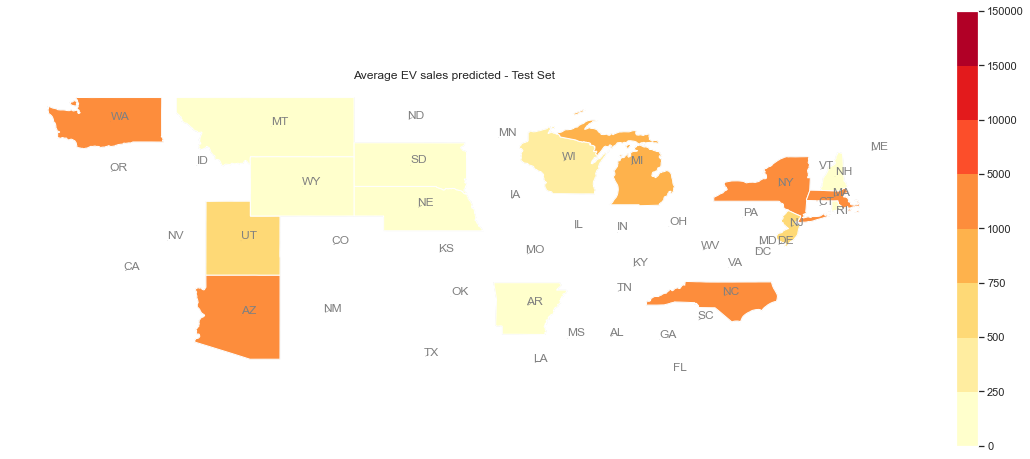

In [157]:

dfPred = pd.merge(us_states_plot,result,on = "StateAbbreviation")
cmap = ListedColormap(["#ffffcc", "#ffeda0", "#fed976", "#feb24c", "#fd8d3c", "#fc4e2a", "#e31a1c","#b10026"])
bounds = [0,250,500,750,1000,5000,10000,15000,150000]
norm = BoundaryNorm(bounds, cmap.N)
texts = []
ax = dfPred.geometry.plot(figsize = (20, 16), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
for x, y, label in zip(us_states_plot_points.geometry.x, us_states_plot_points.geometry.y, us_states_plot_points["STUSPS"]):
    texts.append(plt.text(x, y, label, color='grey', fontsize = 12))
aT.adjust_text(texts, force_points=0.6, force_text=1, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
dfPred.plot(column = 'prediction', legend_kwds={'shrink': 0.5}, legend=True, ax=ax, cmap=cmap, norm=norm)
ax.axis('off')
ax.set_title("Average EV sales predicted - Test Set")
None
f = plt.gcf()
f.savefig('avg_sales_pred_test.jpg')

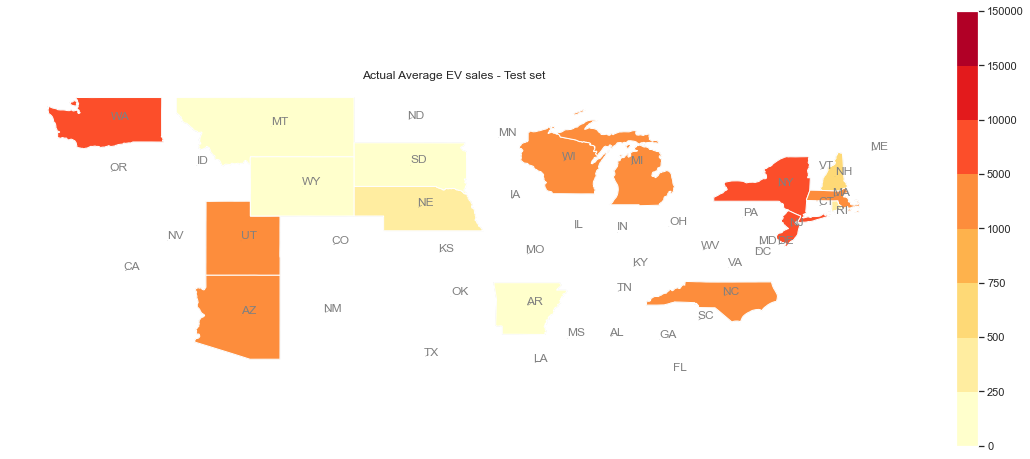

In [158]:
cmap = ListedColormap(["#ffffcc", "#ffeda0", "#fed976", "#feb24c", "#fd8d3c", "#fc4e2a", "#e31a1c","#b10026"])
bounds = [0,250,500,750,1000,5000,10000,15000,150000]
norm = BoundaryNorm(bounds, cmap.N)
texts = []
ax = dfPred.geometry.plot(figsize = (20, 16), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
for x, y, label in zip(us_states_plot_points.geometry.x, us_states_plot_points.geometry.y, us_states_plot_points["STUSPS"]):
    texts.append(plt.text(x, y, label, color='grey', fontsize = 12))
aT.adjust_text(texts, force_points=0.6, force_text=1, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
dfPred.plot(column = 'average_sales', legend_kwds={'shrink': 0.5}, legend=True, ax=ax, cmap=cmap, norm=norm)
ax.axis('off')
ax.set_title("Actual Average EV sales - Test set")
None
f = plt.gcf()
f.savefig('avg_sales_test.jpg')

In [159]:
xPred = np.array(X)
predForPlot = clf.predict(xPred)

In [160]:

result = pd.DataFrame({ 'true_labels': Y, 'prediction': predForPlot.astype(int)}) 
result.insert(2,'StateAbbreviation',df['StateAbbreviation'])

In [161]:
us_states_predicted = pd.merge(us_states_plot,result,on = "StateAbbreviation")

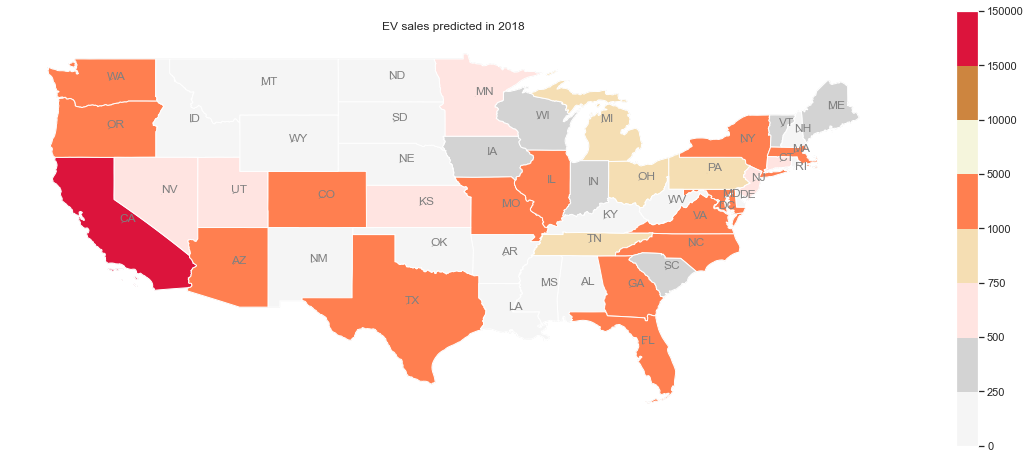

In [162]:
cmap = ListedColormap(["whitesmoke", "lightgrey", "mistyrose", "wheat", "coral", "beige", "peru","crimson"])
bounds = [0,250,500,750,1000,5000,10000,15000,150000]
norm = BoundaryNorm(bounds, cmap.N)
texts = []
ax = us_states_predicted.geometry.plot(figsize = (20, 16), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
for x, y, label in zip(us_states_plot_points.geometry.x, us_states_plot_points.geometry.y, us_states_plot_points["STUSPS"]):
    texts.append(plt.text(x, y, label, color='grey', fontsize = 12))
aT.adjust_text(texts, force_points=0.6, force_text=1, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
us_states_predicted.plot(column = 'prediction', legend_kwds={'shrink': 0.5}, legend=True, ax=ax, cmap=cmap, norm=norm)
ax.axis('off')
ax.set_title("EV sales predicted in 2018")
None